### PyFVCOM plotting tools

Here, we demonstrate plotting of the model bathymetry.

We load some model output into an object which can be passed to a number of plotting objects. These objects have methods for plotting different aspects of the data.

In [9]:
matplotlib inline

In [8]:
# Load an FVCOM model output and plot a surface.
from PyFVCOM.read import FileReader
from PyFVCOM.plot import Plotter, Time, Depth
from PyFVCOM.tide import make_water_column
#from cmocean import cm
import matplotlib.pyplot as plt
import mpl_toolkits
import os

In [10]:
# Create an object which holds the model outputs. We're only loading
# bathimetry to plot it. 
mydir = r"W:\users\odiaz\models\FVCOM\intel_2022.0.2\fvcom27\run_PB\OUTPUT_PB10.1_test\netcdf"
fvcom = FileReader( os.path.join(mydir, 'pb10.1_0001.nc'), variables=['h'])

cannot be safely cast to variable data type (c:\tools\github\pyfvcom\PyFVCOM\grid\_grid.py:91)
cannot be safely cast to variable data type (c:\tools\github\pyfvcom\PyFVCOM\grid\_grid.py:91)
h does not contain a time dimension. (c:\tools\github\pyfvcom\PyFVCOM\read.py:1261)


Text(0.5, 1.0, 'Topo/Bathymetry (m)')

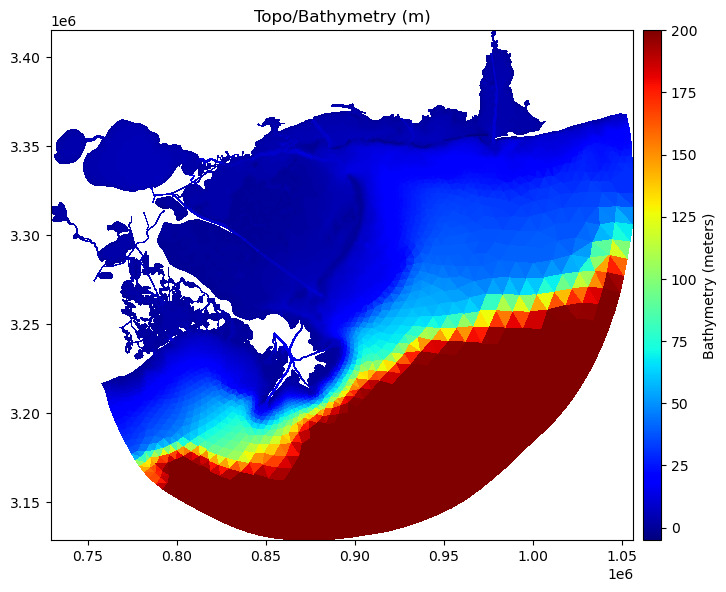

In [13]:
# Make a plot of the topo/bathymetry.

plot = Plotter(fvcom, 
               figsize=(20, 20),  
               cartesian=True,             
               cb_label='{} ({})'.format(fvcom.atts.h.long_name,
                                         fvcom.atts.h.units),
               cmap='jet')
plot.plot_field(fvcom.data.h[:], cmap='jet')
plot.axes.set_title('Topo/Bathymetry (m)')